In [1]:
#from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from dl_toolbox.utils import EventAccumulator
from glob import glob

input_dirs = glob("/home/eh/fournip/tensorboard/logs/semcity_pretrained/version_*")
print(input_dirs)
accumulators = [EventAccumulator(dirname).Reload() for dirname in input_dirs]

/work/OT/ai4usr/fournip/vre_venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['/home/eh/fournip/tensorboard/logs/semcity_pretrained/version_0', '/home/eh/fournip/tensorboard/logs/semcity_pretrained/version_1']


In [2]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import glob
#import brewer2mpl

In [3]:
values_list = []
for accu in accumulators:
    _, steps, values = zip(*accu.Scalars('Val_acc'))
    values_list.append(np.array(values))
values_agg = np.stack(values_list)
steps = np.array(steps)
print(values_agg.shape)
print(steps.shape)

(2, 100)
(100,)


In [4]:
avg = np.mean(values_agg, axis=0)
print(avg.shape)

(100,)


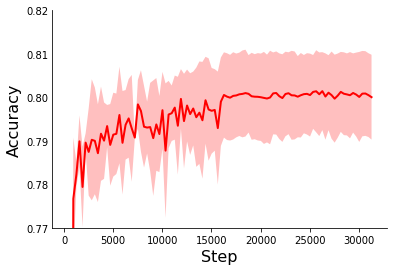

In [6]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)

params = {
    'axes.labelsize': 16,
    'legend.fontsize': 16,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'text.usetex': False,
    'figure.figsize': [9, 7],
}

plt.rcParams.update(params)

#ax1.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', direction='out')
ax1.tick_params(axis='y', length=0)
#for spine in ax1.spines.values():
#    spine.set_position(('outward', 5))
#ax1.set_xlim(0, 810)
##ax1.set_ylim(0,1)
ax1.set_ylim(0.77, 0.82)
ax1.set_xlabel("Step")
ax1.set_ylabel("Accuracy")
#ax1.set_xticks(np.arange(0, 810, 200))
##ax1.set_yticks(np.arange(0,1,0.1))
#ax1.set_yticks(np.arange(0, 4500, 1000))

ax1.fill_between(steps, values_agg[0], values_agg[1], alpha=0.25, linewidth=0, color='red')
ax1.plot(steps, 
         avg, 
         linewidth=2, 
         linestyle='solid', 
         color='red',
         label='Validation accuracy'
        )